In [1]:
library(GLMsData)
library(statmod)
library(MASS)
library(splines)

Warning message:
"package 'statmod' was built under R version 3.6.3"

In [2]:
data(lime)

In [3]:
str(lime)

'data.frame':	385 obs. of  4 variables:
 $ Foliage: num  0.1 0.2 0.4 0.6 0.6 0.8 1 1.4 1.7 3.5 ...
 $ DBH    : num  4 6 8 9.6 11.3 13.7 15.4 17.8 18 22 ...
 $ Age    : int  38 38 46 44 60 56 72 74 68 79 ...
 $ Origin : Factor w/ 3 levels "Coppice","Natural",..: 2 2 2 2 2 2 2 2 2 2 ...


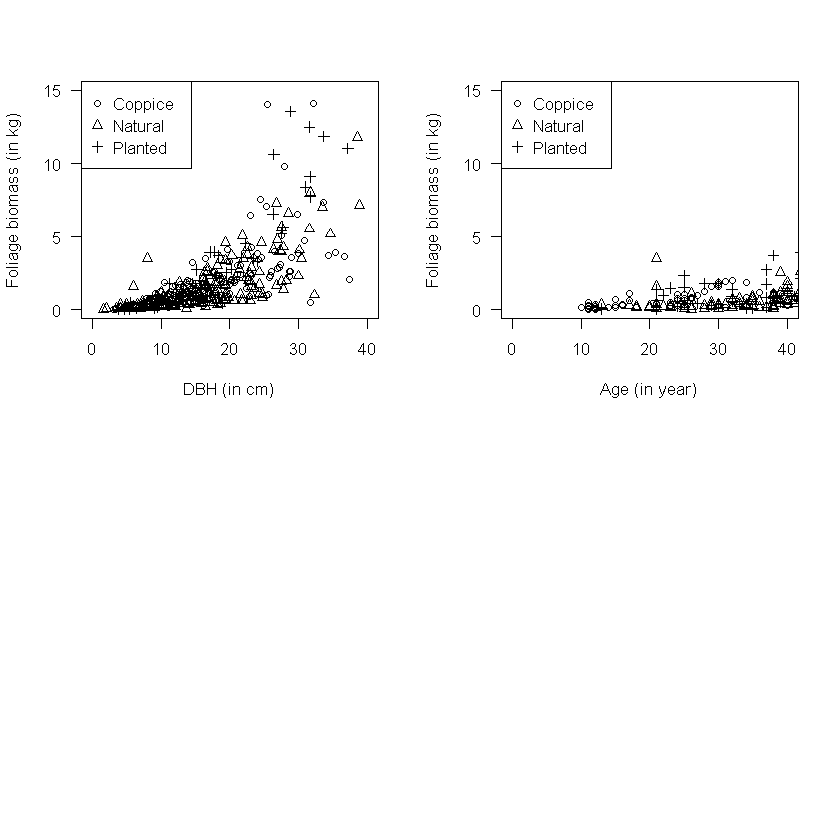

In [6]:
par(mfrow=c(2, 2))
plot(Foliage ~ DBH, type="n", las=1,
xlab="DBH (in cm)", ylab="Foliage biomass (in kg)",
ylim = c(0, 15), xlim=c(0, 40), data=lime)
points(Foliage ~ DBH, data=subset(lime, Origin=="Coppice"),
pch=1)
points(Foliage ~ DBH, data=subset(lime, Origin=="Natural"),
pch=2)
points(Foliage ~ DBH, data=subset(lime, Origin=="Planted"),
pch=3)
legend("topleft", pch=c(1, 2, 3),
legend=c("Coppice", "Natural","Planted"))

plot(Foliage ~ Age, type="n", las=1,
xlab="Age (in year)", ylab="Foliage biomass (in kg)",
ylim = c(0, 15), xlim=c(0, 40), data=lime)
points(Foliage ~ Age, data=subset(lime, Origin=="Coppice"),
pch=1)
points(Foliage ~ Age, data=subset(lime, Origin=="Natural"),
pch=2)
points(Foliage ~ Age, data=subset(lime, Origin=="Planted"),
pch=3)
legend("topleft", pch=c(1, 2, 3),
legend=c("Coppice", "Natural","Planted"))


In [33]:
glm.max <- glm(Foliage ~ (log(DBH) + log(Age) + Origin)^2, data=lime, family = Gamma(link="log"))
glm.min <- glm(Foliage ~ log(DBH), data=lime, family = Gamma(link="log"))

In [34]:
m.f <- step(glm.min, scope=list(lower=glm.min, upper=glm.max), direction="both")

Start:  AIC=776.83
Foliage ~ log(DBH)

           Df Deviance    AIC
+ Origin    2   160.58 771.14
+ log(Age)  1   163.80 774.84
<none>          166.06 776.83

Step:  AIC=767.02
Foliage ~ log(DBH) + Origin

                  Df Deviance    AIC
+ log(DBH):Origin  2   152.69 758.04
<none>                 160.58 767.02
+ log(Age)         1   160.07 768.18
- Origin           2   166.06 772.02

Step:  AIC=750.33
Foliage ~ log(DBH) + Origin + log(DBH):Origin

                  Df Deviance    AIC
<none>                 152.69 750.33
+ log(Age)         1   152.18 751.39
- log(DBH):Origin  2   160.58 760.82


In [35]:
glm.1 <- glm(Foliage ~ log(DBH) + log(Age), data=lime, family = Gamma(link="log"))

In [36]:
coef(summary(glm.1))

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),-4.2532252,0.2845458,-14.947417,4.223886e-40
log(DBH),2.0457425,0.1200015,17.047642,7.264209e-49
log(Age),-0.2641572,0.1282077,-2.060386,4.003841e-02


In [37]:
anova(glm.1, test="F")

,Df,Deviance,Resid. Df,Resid. Dev,F,Pr(>F)
NULL,NA,NA,384,508.4806,NA,NA
log(DBH),1,342.425619,383,166.0550,628.779419,9.948337e-83
log(Age),1,2.254663,382,163.8004,4.140127,4.256814e-02


In [38]:
gof.dev <- deviance(glm.1)
gof.pearson <- sum(glm.1$weights * glm.1$residuals^2)

pchisq(gof.dev, df=df.residual(glm.1), lower.tail = FALSE)
pchisq(gof.pearson, df=df.residual(glm.1), lower.tail = FALSE)

gof.dev / df.residual(glm.1)
gof.pearson / df.residual(glm.1)
summary(glm.1)$dispersion

[1] 1

[1] 1

[1] 0.4287967

[1] 0.5445878

[1] 0.5445878


	Shapiro-Wilk normality test

data:  qr1
W = 0.97599, p-value = 5.288e-06


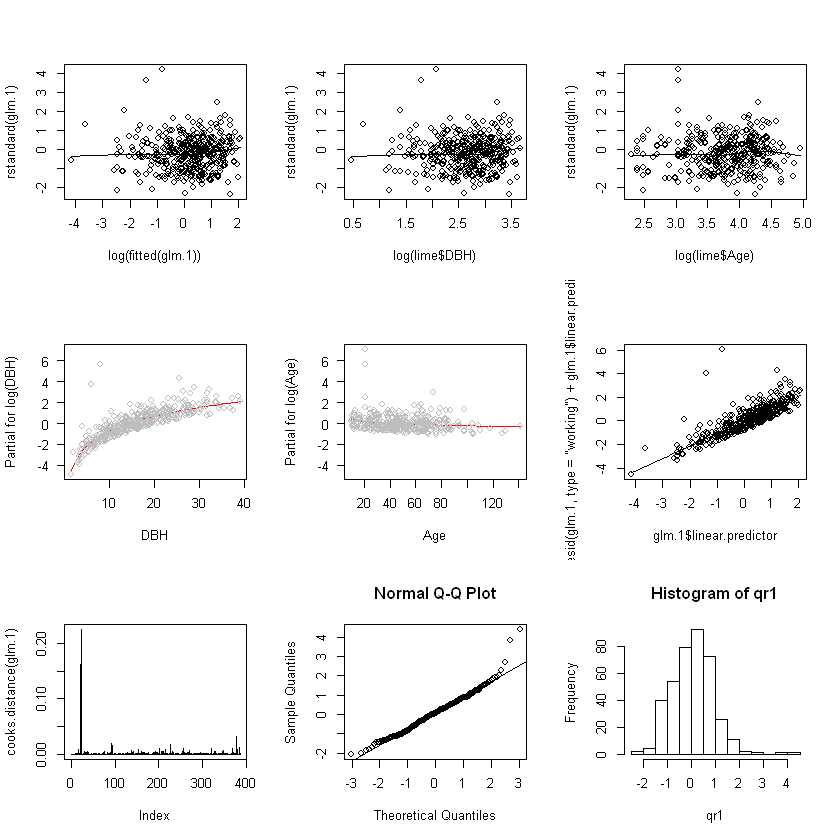

In [45]:
par(mfrow=c(3, 3))

scatter.smooth(rstandard(glm.1) ~ log(fitted(glm.1)))
scatter.smooth(rstandard(glm.1) ~ log(lime$DBH))
scatter.smooth(rstandard(glm.1) ~ log(lime$Age))
termplot(glm.1, partial.resid = TRUE, las=1)
scatter.smooth(resid(glm.1, type="working") + glm.1$linear.predictor ~ glm.1$linear.predictor)
plot(cooks.distance(glm.1), type="h")
qqnorm(qr1 <- qresid(glm.1))
qqline(qr1)
hist(qr1)
shapiro.test(qr1)

In [44]:
colSums(influence.measures(glm.1)$is.inf)

dfb.1_ dfb.l(DB dfb.l(A)    dffit    cov.r   cook.d      hat 
       0        0        0        5       26        0        8